In [72]:
import requests
from pprint import pprint
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
from config import b_api_key 
import numpy as np
from matplotlib import pyplot as plt


In [59]:
sns.set()

In [45]:
def num_hours_ago(hours):
    """
    Returns UTC time x hours ago.
    """
#     from datetime import datetime as dt
    date = dt.utcnow() - timedelta(hours=hours)
    return dt.strftime(date, "%Y-%m-%dT%H:%M:%S")

In [ ]:
# to make graphs/visualization/heatmap of cities with most pollution:
# plot coordinates against a leaflet map, make marker sizes proportioinate to aqi.
# want all historical data in last 30 days.
# can make a plot that will have a sliding scale to have past 30 days for each city if user chooses city. 

In [48]:
def get_coords(location):
    """
    Returns coordinates of address for given input.
    """
    from config import g_api_key
    base_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={location}&key={g_api_key}"
    
    data = requests.get(base_url).json()
    loc = data['results'][0]['geometry']['location']
    
    lat = loc['lat']
    lng = loc['lng']
    
    return lat,lng

In [56]:
def pollution(lat,lng):
    """
    Returns pollution data from coordinates.
    """
    from config import b_api_key 
    
    end_datetime = num_hours_ago(1)
    start_datetime = num_hours_ago(168)
    
    try:
        base_url = f"https://api.breezometer.com/air-quality/v2/historical/hourly?lat={lat}&lon={lng}&key={b_api_key}&start_datetime={start_datetime}&end_datetime={end_datetime}"

        data = requests.get(base_url).json()
#         baqi = data['data']['indexes']['baqi']
        
    except:
        print(data)

    return data

In [71]:
lat,lng = get_coords("san francisco")
pollution_data = pollution(lat,lng)

In [69]:
x = [x['datetime'] for x in pollution_data['data']]
y = [y['indexes']['baqi']['aqi'] for y in pollution_data['data']]

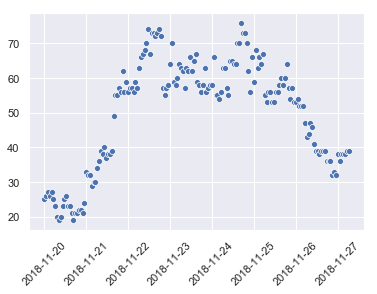

In [85]:
sns.scatterplot(x=x, y=y)
plt.xticks(np.arange(len(x),step=23), labels, rotation=45)
plt.show()

In [53]:
# # Get pollution data for 1000 US cities

# def pollution(coordinates):
#     """
#     Returns pollution data from list of coordinates.
#     """
#     from config import b_api_key 
    
#     pollution_data = []
    
#     for k,v in coordinates.items():
#         try:
#             dic = {}

#             lat = v[0]
#             lng = v[1]
#             base_url = f"https://api.breezometer.com/air-quality/v2/current-conditions?lat={lat}&lon={lng}&key={b_api_key}&start_datetime=2018-10-21T06:00:00&end_datetime=2018-11-21T08:00:00"

#             data = requests.get(base_url).json()

#             baqi = data['data']['indexes']['baqi']
#             dic[k] = baqi
#             dic[k]['coordinates'] = v

#             pollution_data.append(dic)
#         except:
#             print(f"Error accessing {k}'s data. Skipping...")
#             pass

#     return pollution_data

In [2]:
# # Get coordinates for 1000 US cities.

# def city_coordinates():
#     """
#     Returns dictionary of cities w/their coordinates.
#     """
    
#     base_url  = "https://public.opendatasoft.com/api/records/1.0/search/?"
#     query = "dataset=1000-largest-us-cities-by-population-with-geographic-coordinates&sort=-rank&facet=city&facet=state&rows=1000"

#     result = requests.get(base_url+query).json()

#     records = result['records']

#     dic = {}

#     for record in records:
#         dic[record['fields']['city']] = record['fields']['coordinates']
    
#     return dic

In [70]:
# # get past 30 days:
# def last_x_days(day):
#     """ 
#     Returns a list of last x days.
#     """
#     dates = []
#     for day in range(days):
#         dates.append(num_days_ago(day))

#     return dates